In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io, color

'''
Firstly, I had to change the image format from jpg to png as my system was not able to read the jpg files
'''

#jpg to png for Beagle images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Beagle\n02088364-beagle')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Beaglepng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Dhole images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Dhole\n02115913-dhole')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Dholepng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Golden retirever images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Golden retriever\n02099601-golden_retriever')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Golden Retrieverpng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")


# jpg to png for Great pyreness images
# Directory containing your JPG images
jpg_dir = (r'D:\Dataset\Great pyreness\n02111500-Great_Pyrenees')

# Directory where you want to save the PNG images
png_dir = (r'D:\Dataset\Great pyrenesspng')

# Ensure the output directory exists
os.makedirs(png_dir, exist_ok=True)

# List all JPG files in the input directory
jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]

# Convert each JPG image to PNG
for jpg_file in jpg_files:
    # Construct the full paths for input and output files
    jpg_path = os.path.join(jpg_dir, jpg_file)
    png_file = jpg_file.replace('.jpg', '.png')
    png_path = os.path.join(png_dir, png_file)

    # Open the JPG image and save it as PNG
    image = Image.open(jpg_path)
    image.save(png_path, 'PNG')

    print(f"Converted: {jpg_file} -> {png_file}")

In [ ]:

# Cropping and resizing the images for Golden retriever Data set (Data set 1)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Golden Retriever annonations\\n02099601-golden_retriever' 
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Golden Retrieverpng' 
output_dir = 'D:\Dataset\Golden Retriever cropped' 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'  
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")


# Cropping and resizing the images for Beagle Data set (Data set 2)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Beagle annonations\\n02088364-beagle'  
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Beaglepng'  
output_dir = 'D:\Dataset\Beagle cropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")


# Cropping and resizing the images for Dhole Data set (Data set 3)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Dhole annonations\\n02115913-dhole'  
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Dholepng'  
output_dir = 'D:\Dataset\Dholecropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png' 
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")



# Cropping and resizing the images for Great Pyreness Data set (Data set 4)
# Step 1: Load the Annotations Dataset (Assuming XML format)
annotations_dir = 'D:\Dataset\Great Pyreness annonations\\n02111500-Great_Pyrenees' 
annotations_files = os.listdir(annotations_dir)

# Step 2: Load the Images Dataset
images_dir = 'D:\Dataset\Great pyrenesspng' 
output_dir = 'D:\Dataset\Great pyreness cropped'  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 3: Parse XML Data and Crop & Resize Images
for xml_file in annotations_files:
    xml_path = os.path.join(annotations_dir, xml_file)
    image_filename = os.path.splitext(xml_file)[0] + '.png'  
    image_path = os.path.join(images_dir, image_filename)

    if os.path.exists(image_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract bounding box coordinates
        xmin = int(root.find(".//xmin").text)
        ymin = int(root.find(".//ymin").text)
        xmax = int(root.find(".//xmax").text)
        ymax = int(root.find(".//ymax").text)

        # Load and crop the image
        image = Image.open(image_path)
        cropped_image = image.crop((xmin, ymin, xmax, ymax))

        # Resize the cropped image to 100x100 pixels
        resized_image = cropped_image.resize((100, 100), Image.ANTIALIAS)

        # Save the resized image as PNG
        output_path = os.path.join(output_dir, image_filename)
        resized_image.save(output_path, "PNG")

        print(f"Processed: {image_filename}")

print("All images processed and saved.")


In [ ]:
# Converting each dataset folder to Grayscale images
# FOR BEAGLE Dataset 1
from PIL import Image
import os


def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Beagle cropped"
    output_folder = "D:\Dataset\BeagleGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


# FOR DHOLE Dataset 2

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Dholecropped"
    output_folder = "D:\Dataset\DholeGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


# FOR GOLDEN RETRIEVER Dataset 3

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Golden Retriever cropped"
    output_folder = "D:\Dataset\Golden retrieverGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)
    

# FOR GOLDEN PYRENESS Dataset 4

def convert_to_grayscale(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Check if the file is an image (you may want to add more comprehensive checks)
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Convert to grayscale
                grayscale_img = img.convert('L')

                # Save the grayscale image to the output folder
                output_path = os.path.join(output_folder, f"grayscale_{filename}")
                grayscale_img.save(output_path)


if __name__ == "__main__":
    # Specify the input and output folders
    input_folder = "D:\Dataset\Great pyreness cropped"
    output_folder = "D:\Dataset\Great PyrenessGS"

    # Call the function to convert images to grayscale
    convert_to_grayscale(input_folder, output_folder)


In [6]:
# (b) Histogram Equalization (Image Intensity Normalization)

def convert_to_grayscale(input_folders, output_folder):
    # Iterate over each class folder
    for class_folder in input_folders:

        # Counter to keep track of selected images
        image_count = 0

        # Iterate over each image in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Check if it's a file and ends with a common image extension (you can adjust this list)
            if os.path.isfile(image_path) and image_name.lower().endswith(('.png')):
                # Open the image
                original_image = Image.open(image_path)

                # Convert to grayscale
                grayscale_image = original_image.convert('L')

                # Save the grayscale image
                output_path = os.path.join(output_folder, f'grayscale_{os.path.basename(class_folder)}_{image_name}')
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                grayscale_image.save(output_path)

                # Increment the counter
                image_count += 1

                # Break the loop after processing 2 images per class
                if image_count >= 2:
                    break


# Specify the input folders and output folder
input_folders = [
    'D:\Dataset\Beagle cropped',
    'D:\Dataset\Dholecropped',
    'D:\Dataset\Golden Retriever cropped',
    'D:\Dataset\Great pyreness cropped',
]
output_folder = 'D:\Dataset\Grayscaleimages'

# Call the function
convert_to_grayscale(input_folders, output_folder)



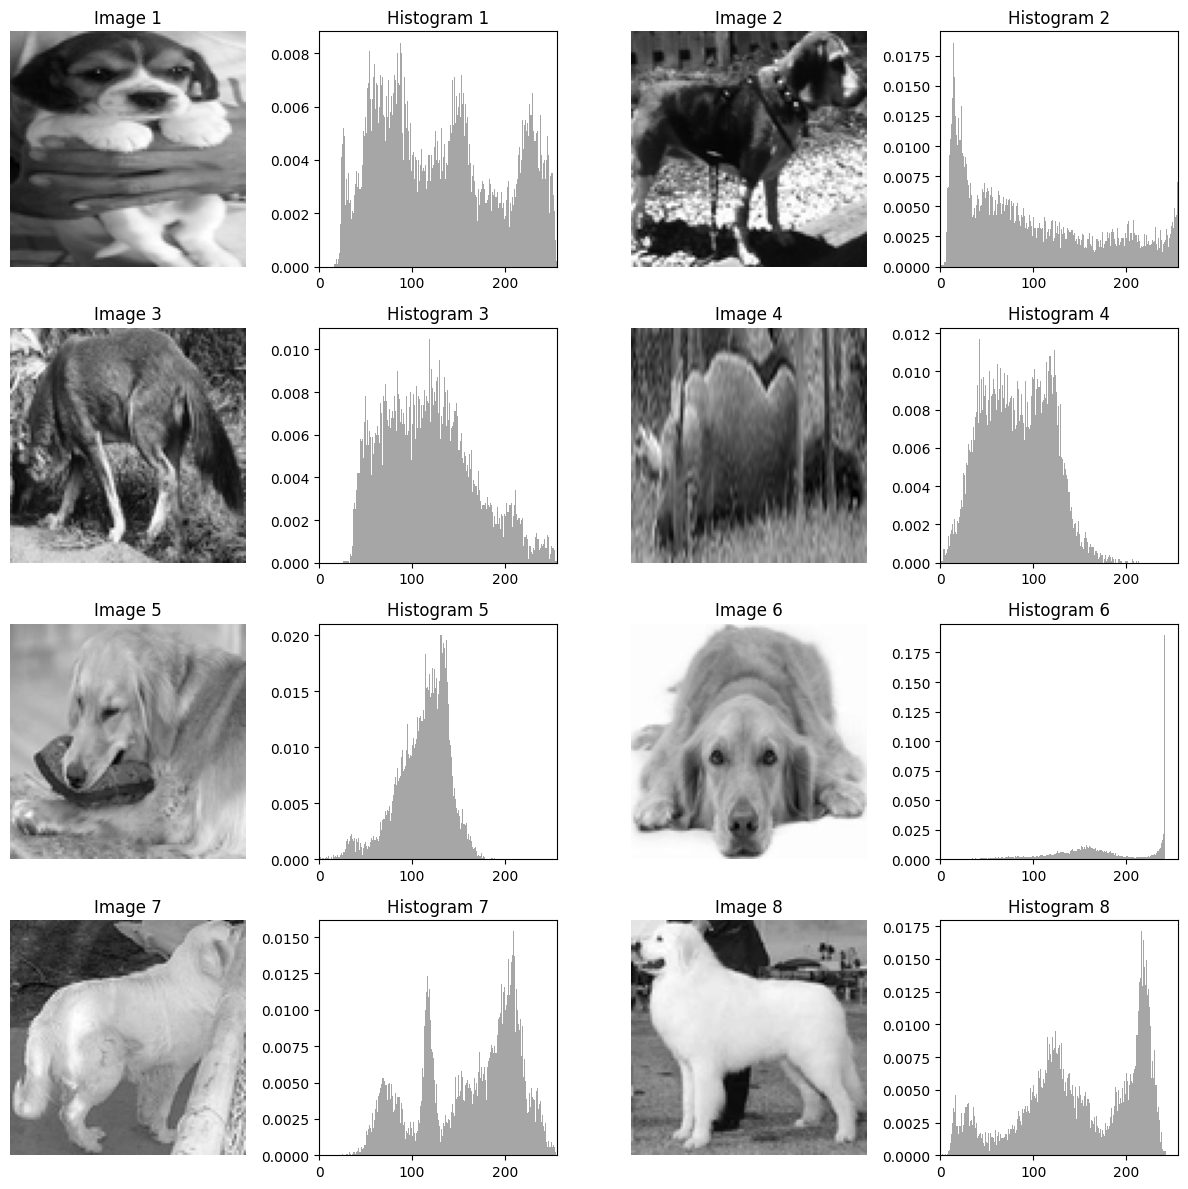

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
# Plot the 8 grayscale images with their corresponding pixel intensity histograms
def plot_images_with_histograms(image_folder):
    # Get a list of all grayscale images in the folder
    grayscale_images = [image for image in os.listdir(image_folder) if image.lower().startswith('grayscale')]

    # Create subplots for each image
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()

    for i, image_name in enumerate(grayscale_images):
        # Load the grayscale image
        image_path = os.path.join(image_folder, image_name)
        grayscale_image = Image.open(image_path)

        # Plot the image
        axes[i * 2].imshow(grayscale_image, cmap='gray')
        axes[i * 2].axis('off')
        axes[i * 2].set_title(f'Image {i + 1}')

        # Plot the histogram
        axes[i * 2 + 1].hist(grayscale_image.getdata(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
        axes[i * 2 + 1].set_title(f'Histogram {i + 1}')
        axes[i * 2 + 1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Specify the folder containing grayscale images
grayscale_folder = 'D:\Dataset\Grayscaleimages'

# Call the function
plot_images_with_histograms(grayscale_folder)




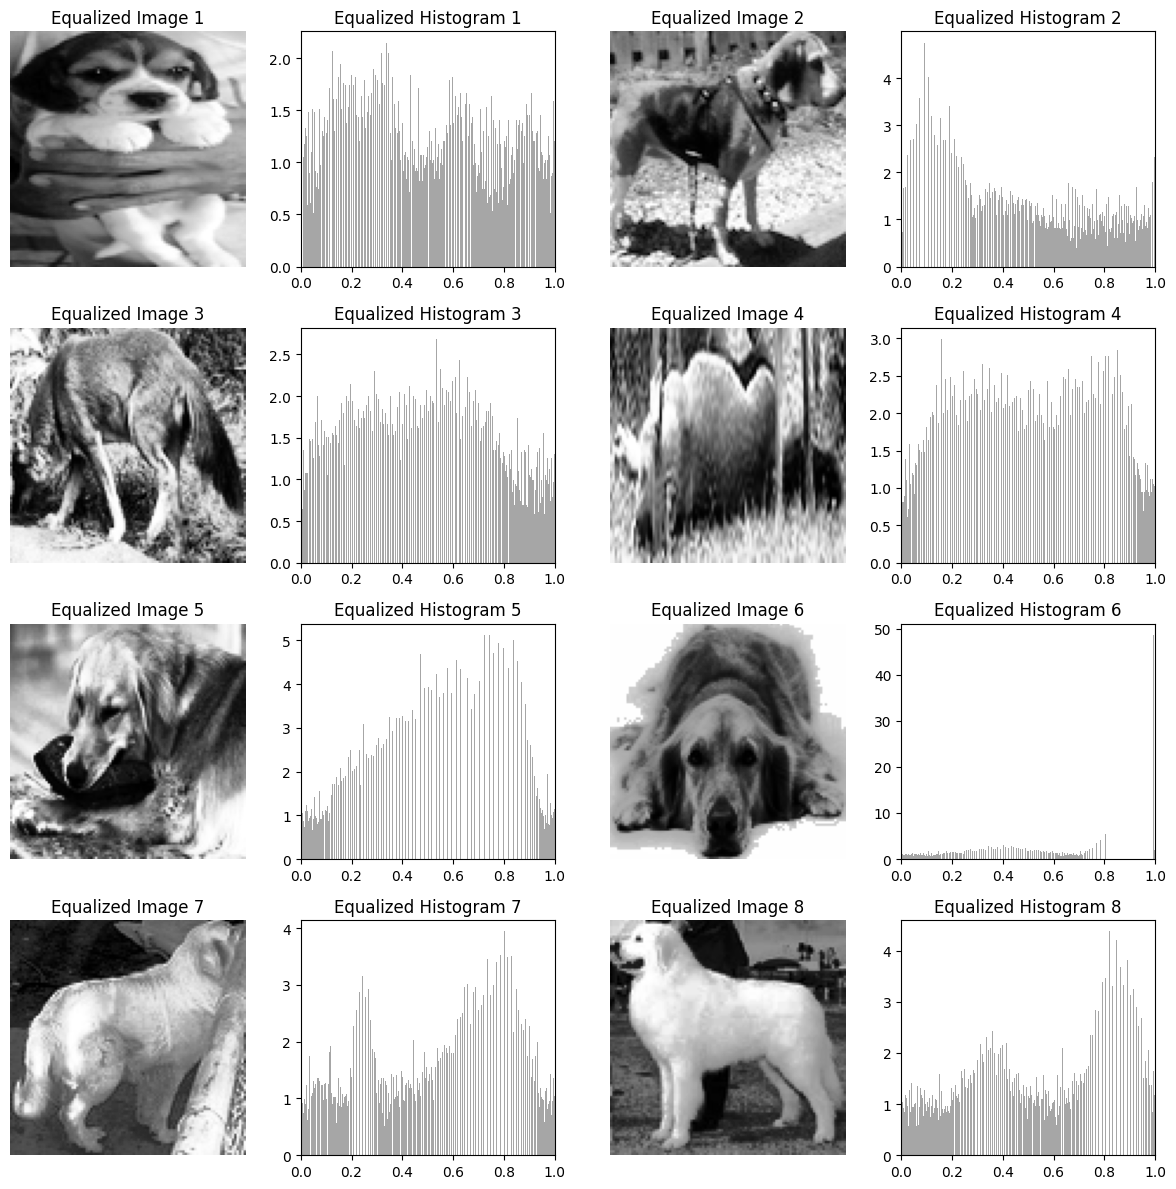

In [2]:

# Perform histogram equalization on the 8 images. Plot the NEW intensity equalized grayscale 
# images and their corresponding equalized pixel intensity histograms.

def histogram_equalize_images(image_folder, output_folder):
    # Get a list of all grayscale images in the folder
    grayscale_images = [image for image in os.listdir(image_folder) if image.lower().startswith('grayscale')]

    # Create subplots for each image
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()

    for i, image_name in enumerate(grayscale_images):
        # Load the grayscale image
        image_path = os.path.join(image_folder, image_name)
        grayscale_image = Image.open(image_path)

        # Convert PIL Image to NumPy array
        grayscale_array = np.array(grayscale_image)

        # Perform histogram equalization
        equalized_array = exposure.equalize_hist(grayscale_array)

        # Plot the equalized image
        axes[i * 2].imshow(equalized_array, cmap='gray')
        axes[i * 2].axis('off')
        axes[i * 2].set_title(f'Equalized Image {i + 1}')

        # Plot the equalized histogram
        axes[i * 2 + 1].hist(equalized_array.ravel(), bins=256, range=(0, 1), density=True, color='gray', alpha=0.7)
        axes[i * 2 + 1].set_title(f'Equalized Histogram {i + 1}')
        axes[i * 2 + 1].set_xlim([0, 1])

        # Save the equalized image
        output_path = os.path.join(output_folder, f'equalized_{image_name}')
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        Image.fromarray((equalized_array * 255).astype('uint8')).save(output_path)

    plt.tight_layout()
    plt.show()

# Specify the folder containing grayscale images and the folder to save equalized images
grayscale_folder = 'D:\Dataset\Grayscaleimages'
equalized_folder = 'D:\Dataset\EqualizedGSimages'

# Call the function
histogram_equalize_images(grayscale_folder, equalized_folder)



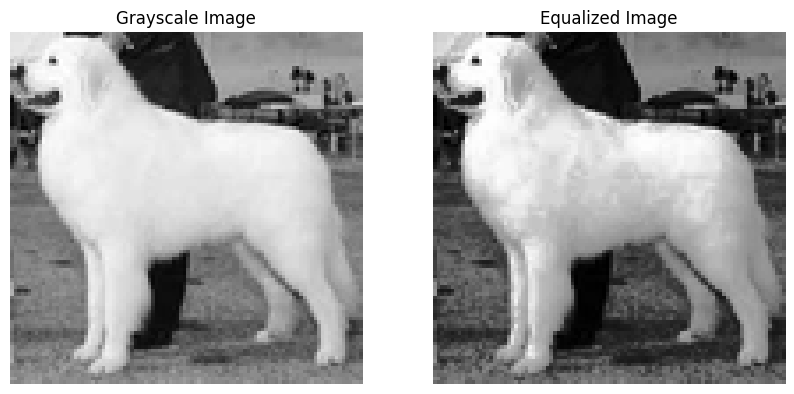

'\nObservation:\nThrough the distribution of the intensity values, histogram equalization improves the contrast of the image. The details\nbecame more clear. \n'

In [1]:

# Pick a grayscale image and its corresponding equalized image. Plot the 2 images next to each
# other. What did you observe?

import os
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io, color

def plot_grayscale_and_equalized_images(grayscale_path, equalized_path):
    # Load the grayscale and equalized images
    grayscale_image = Image.open(grayscale_path)
    equalized_image = Image.open(equalized_path)

    # Create subplots for the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the grayscale image
    axes[0].imshow(grayscale_image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('Grayscale Image')

    # Plot the equalized image
    axes[1].imshow(equalized_image, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Equalized Image')

    plt.show()

# Specify the paths to the grayscale and equalized images
grayscale_path = 'D:\Dataset\Grayscaleimages\grayscale_Great pyreness cropped_n02111500_1048.png'
equalized_path = 'D:\Dataset\EqualizedGSimages\equalized_grayscale_Great pyreness cropped_n02111500_1048.png'

# Call the function
plot_grayscale_and_equalized_images(grayscale_path, equalized_path)


'''
Observation:
Through the distribution of the intensity values, histogram equalization improves the contrast of the image. The details
became more clear. 
'''


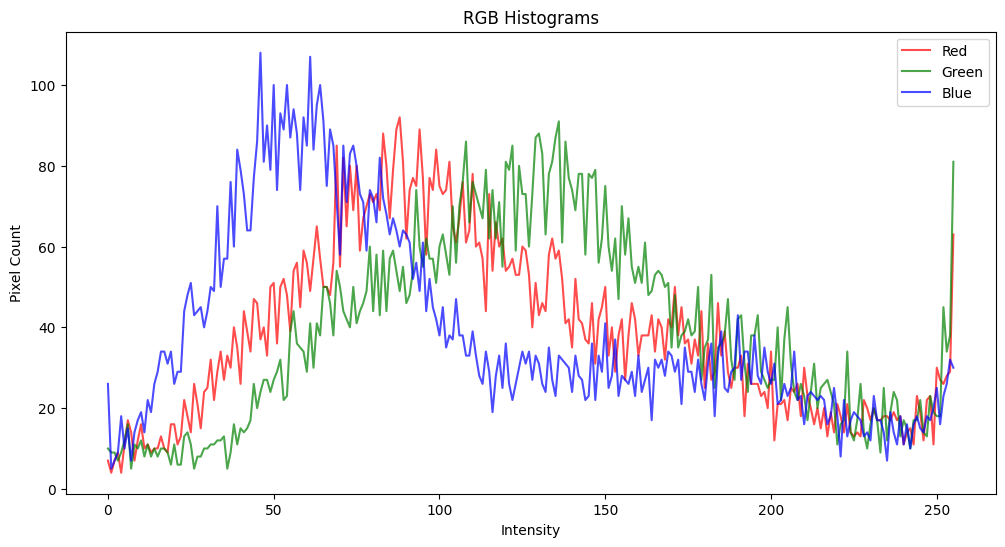

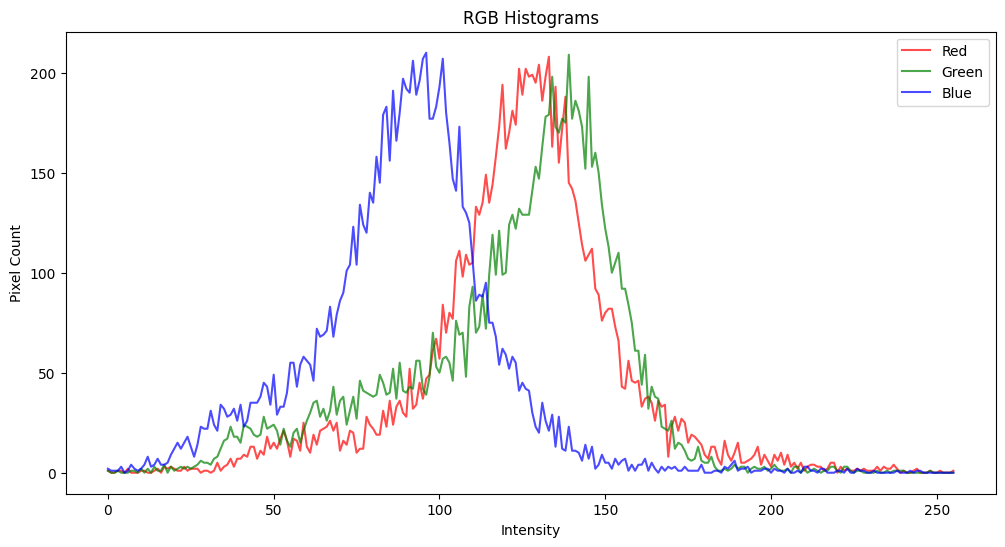

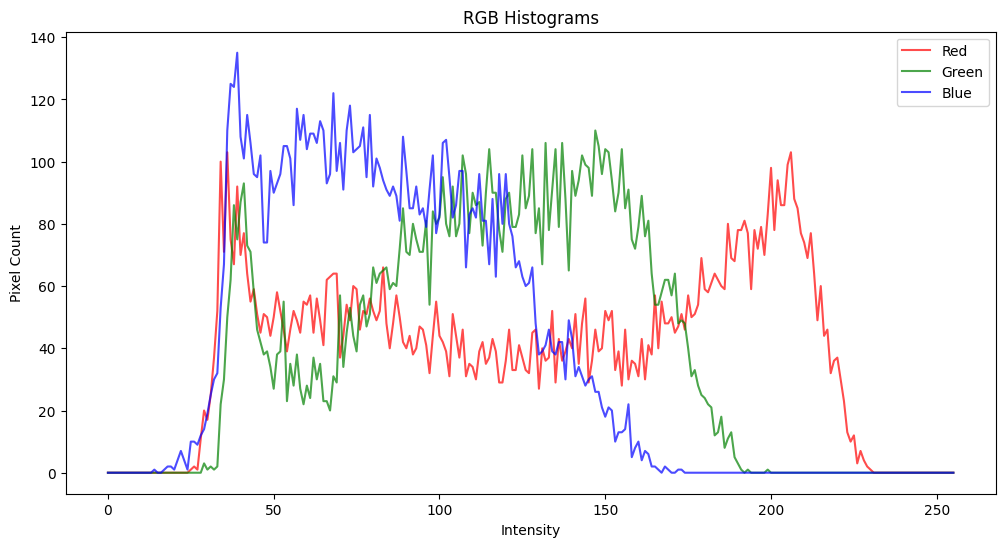

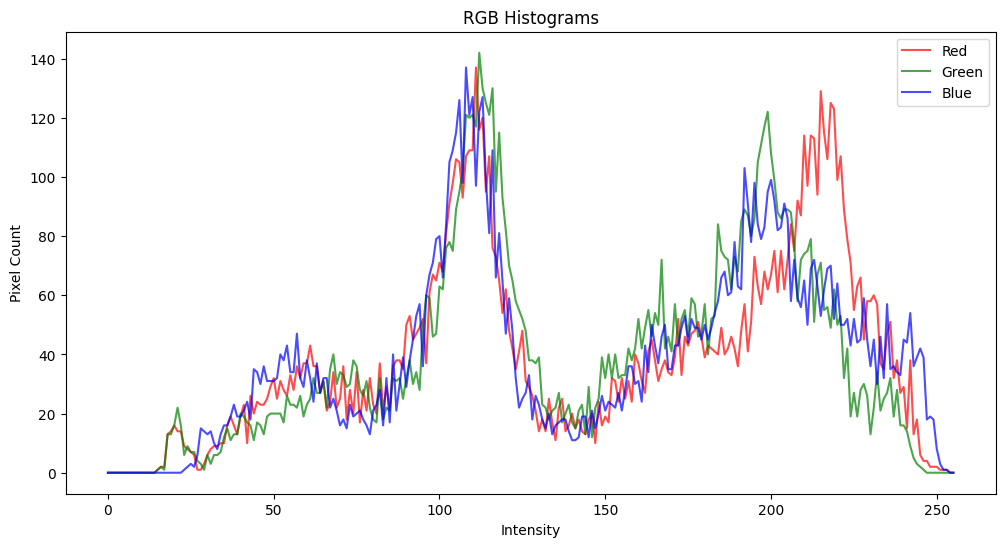

In [20]:
# (c) RGB histogram

# Choosing 1 image from each class.
# Plotting the images with their corresponding RGB histogram values

def plot_rgb_histogram(image_path):
    # Load the image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Calculate RGB histograms
    hist_r, bin_edges_r = np.histogram(img_array[:,:,0].ravel(), bins=256, range=(0, 256), density=False)
    hist_g, bin_edges_g = np.histogram(img_array[:,:,1].ravel(), bins=256, range=(0, 256), density=False)
    hist_b, bin_edges_b = np.histogram(img_array[:,:,2].ravel(), bins=256, range=(0, 256), density=False)

    # Plot RGB histograms
    plt.figure(figsize=(12, 6))

    plt.plot(bin_edges_r[0:-1], hist_r, color='red', label='Red', alpha=0.7)
    plt.plot(bin_edges_g[0:-1], hist_g, color='green', label='Green', alpha=0.7)
    plt.plot(bin_edges_b[0:-1], hist_b, color='blue', label='Blue', alpha=0.7)

    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.title('RGB Histograms')

    plt.legend()
    plt.show()

# Specify the path to one image from each class
image_path_class1 = 'D:\Dataset\Beagle cropped\\n02088364_129.png'
image_path_class2 = 'D:\Dataset\Dholecropped\\n02115913_25.png'
image_path_class3 = 'D:\Dataset\Golden Retriever cropped\\n02099601_5.png'
image_path_class4 = 'D:\Dataset\Great pyreness cropped\\n02111500_17.png'

# Call the function for one image from each class
plot_rgb_histogram(image_path_class1)
plot_rgb_histogram(image_path_class2)
plot_rgb_histogram(image_path_class3)
plot_rgb_histogram(image_path_class4)



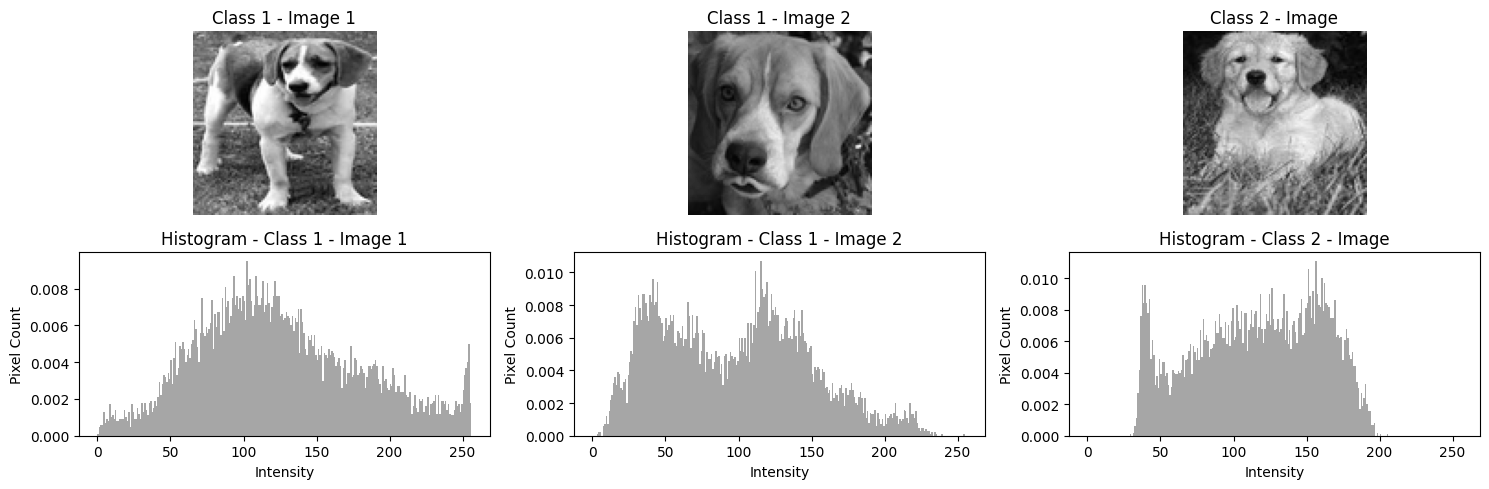

In [21]:
# (d) Histogram Comparison (Measures of Similarity and Dissimilarity)
# Picking 2 images from the same class and 1 image from another class.
# Converting  the three images to grayscale pixel intensity histograms. (These will be the vector
#representations of the images)


def grayscale_and_histogram(image_paths, titles):
    plt.figure(figsize=(15, 5))

    for i, image_path in enumerate(image_paths):
        # Load the image
        img = Image.open(image_path)

        # Convert to grayscale
        img_gray = img.convert('L')
        img_array = np.array(img_gray)

        # Plot the image
        plt.subplot(2, 3, i + 1)
        plt.imshow(img_array, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

        # Plot the histogram
        plt.subplot(2, 3, i + 4)
        plt.hist(img_array.ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
        plt.title(f'Histogram - {titles[i]}')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')

    plt.tight_layout()
    plt.show()


# Specify the paths to the three images
image_path_class1_1 = 'D:\Dataset\Beagle cropped\\n02088364_129.png'
image_path_class1_2 = 'D:\Dataset\Beagle cropped\\n02088364_161.png'
image_path_class2 = 'D:\Dataset\Golden Retriever cropped\\n02099601_5.png'

# Specify corresponding titles
titles = ['Class 1 - Image 1', 'Class 1 - Image 2', 'Class 2 - Image']

# Call the function
grayscale_and_histogram([image_path_class1_1, image_path_class1_2, image_path_class2], titles)


In [22]:

# Performing histogram comparison using the following metrics/measures.
# Euclidean Distance
# Manhattan Distance
# Bhattacharyya distance
# Histogram Intersection
# Performing for Beagle and Golden retriever classes

def calculate_histogram(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale
    img_gray = img.convert('L')

    # Calculate histogram
    histogram, _ = np.histogram(np.array(img_gray).ravel(), bins=256, range=(0, 256), density=True)

    return histogram


def compare_histograms(hist1, hist2, method):
    if method == 'euclidean':
        return distance.euclidean(hist1, hist2)
    elif method == 'manhattan':
        return distance.cityblock(hist1, hist2)
    elif method == 'bhattacharyya':
        return np.sqrt(1 - np.sum(np.sqrt(hist1 * hist2)))
    elif method == 'hist_intersection':
        return np.sum(np.minimum(hist1, hist2))


# Specify the paths to the images
image_path_class1_1 = 'D:\Dataset\Beagle cropped\\n02088364_129.png'
image_path_class1_2 = 'D:\Dataset\Beagle cropped\\n02088364_2019.png'
image_path_class2_1 = 'D:\Dataset\Golden Retriever cropped\\n02099601_5.png'
image_path_class2_2 = 'D:\Dataset\Golden Retriever cropped\\n02099601_10.png'

# Calculate histograms for the images
hist_class1_1 = calculate_histogram(image_path_class1_1)
hist_class1_2 = calculate_histogram(image_path_class1_2)
hist_class2_1 = calculate_histogram(image_path_class2_1)
hist_class2_2 = calculate_histogram(image_path_class2_2)

# Compare histograms for images from the same class
print("Comparison of Images from the Same Class:")
print("Euclidean Distance:", compare_histograms(hist_class1_1, hist_class1_2, 'euclidean'))
print("Manhattan Distance:", compare_histograms(hist_class1_1, hist_class1_2, 'manhattan'))
print("Bhattacharyya Distance:", compare_histograms(hist_class1_1, hist_class1_2, 'bhattacharyya'))
print("Histogram Intersection:", compare_histograms(hist_class1_1, hist_class1_2, 'hist_intersection'))

# Compare histograms for images from different classes
print("\nComparison of Images from Different Classes:")
print("Euclidean Distance:", compare_histograms(hist_class1_1, hist_class2_1, 'euclidean'))
print("Manhattan Distance:", compare_histograms(hist_class1_1, hist_class2_1, 'manhattan'))
print("Bhattacharyya Distance:", compare_histograms(hist_class1_1, hist_class2_1, 'bhattacharyya'))
print("Histogram Intersection:", compare_histograms(hist_class1_1, hist_class2_1, 'hist_intersection'))

Comparison of Images from the Same Class:
Euclidean Distance: 0.04881495672434833
Manhattan Distance: 0.628
Bhattacharyya Distance: 0.25402433127660307
Histogram Intersection: 0.6859999999999999

Comparison of Images from Different Classes:
Euclidean Distance: 0.03764412304729651
Manhattan Distance: 0.46799999999999997
Bhattacharyya Distance: 0.32147356908196095
Histogram Intersection: 0.766


In [ ]:
# (e) Image Feature Descriptor: ORB (Oriented FAST and Rotated BRIEF)


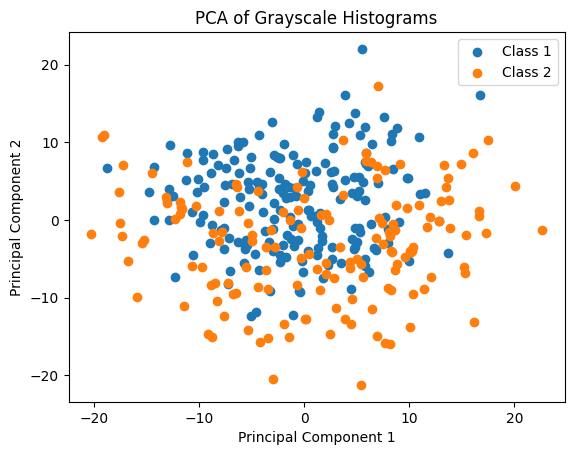

In [23]:
# (f) Dimensionality reduction (using PrincipalComponent Analysis, PCA)
import os
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np
from scipy.spatial import distance
from scipy.stats import wasserstein_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io, color

# Function to compute grayscale pixel intensity histogram for an image
def compute_histogram(image, bins=256):
    hist, _ = np.histogram(image.flatten(), bins=bins, range=[0, 256])
    return hist

# Function to load images and compute histograms
def load_and_compute_histograms(image_paths):
    histograms = []
    for path in image_paths:
        img = io.imread(path)
        # Convert to grayscale if not already in grayscale
        if len(img.shape) == 3:
            img = color.rgb2gray(img)
        hist = compute_histogram(img)
        histograms.append(hist)
    return np.array(histograms)

# Function to normalize the dataset
def normalize_dataset(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

# Load grayscale images and compute histograms

folder_path_class1 = 'D:\Dataset\BeagleGS'
class1_images = [os.path.join(folder_path_class1, file) for file in os.listdir(folder_path_class1) if file.endswith(('.png', '.jpg'))]

folder_path_class1 = 'D:\Dataset\DholeGS'
class2_images = [os.path.join(folder_path_class1, file) for file in os.listdir(folder_path_class1) if file.endswith(('.png', '.jpg'))]


class1_histograms = load_and_compute_histograms(class1_images)
class2_histograms = load_and_compute_histograms(class2_images)

# Combine histograms from both classes
all_histograms = np.concatenate([class1_histograms, class2_histograms], axis=0)

# Normalize the dataset
normalized_data = normalize_dataset(all_histograms)

# Perform PCA dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Plot the PCA result
plt.scatter(pca_result[:len(class1_histograms), 0], pca_result[:len(class1_histograms), 1], label='Class 1')
plt.scatter(pca_result[len(class1_histograms):, 0], pca_result[len(class1_histograms):, 1], label='Class 2')
plt.title('PCA of Grayscale Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

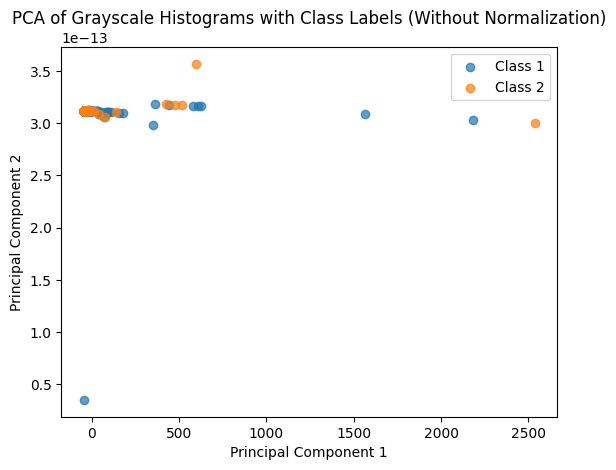

In [24]:
# Plot the 2D points using 2 different colors for data from the 2 classes.Are the data from the two classes separable?


# Function to compute grayscale pixel intensity histogram for an image
def compute_histogram(image, bins=256):
    hist, _ = np.histogram(image.flatten(), bins=bins, range=[0, 256])
    return hist

# Function to load color images, convert to grayscale, and compute histograms
def load_and_compute_histograms(image_paths):
    histograms = []
    for path in image_paths:
        img = io.imread(path)
        # Convert to grayscale
        img_gray = color.rgb2gray(img)
        hist = compute_histogram(img_gray)
        histograms.append(hist)
    return np.array(histograms)

# Load color images and convert to grayscale before computing histograms
folder_path_class1 = 'D:\Dataset\Beagle cropped'
folder_path_class2 = 'D:\Dataset\Golden Retriever cropped'

class1_images = [os.path.join(folder_path_class1, file) for file in os.listdir(folder_path_class1) if file.endswith(('.png', '.jpg'))]
class2_images = [os.path.join(folder_path_class2, file) for file in os.listdir(folder_path_class2) if file.endswith(('.png', '.jpg'))]

class1_histograms = load_and_compute_histograms(class1_images)
class2_histograms = load_and_compute_histograms(class2_images)

# Combine histograms from both classes
all_histograms = np.concatenate([class1_histograms, class2_histograms], axis=0)

# Create corresponding class labels
class_labels = np.concatenate([np.zeros(class1_histograms.shape[0]), np.ones(class2_histograms.shape[0])])

# Perform PCA dimensionality reduction to 2 dimensions without normalization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_histograms)

# Plot the 2D points with different colors for each class
plt.scatter(pca_result[class_labels == 0, 0], pca_result[class_labels == 0, 1], label='Class 1', alpha=0.7)
plt.scatter(pca_result[class_labels == 1, 0], pca_result[class_labels == 1, 1], label='Class 2', alpha=0.7)

plt.title('PCA of Grayscale Histograms with Class Labels (Without Normalization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

'''
The data points are overlapping significantly, hence they are not easily separable
'''
